# K Means Clustering

## What is K means Clustering?

- Clustering is a typical and well-known type of unsupervised learning. 
- Clustering algorithms try to find natural groupings in data. 
- Similar data points (according to some notion of similarity) are considered in the same group. We call these groups clusters.
- K-Means clustering is a simple and widely-used clustering algorithm. Given value of  k , it tries to build  k  clusters from samples in the dataset. 

### How does it work ?

Given the value of K clusters, the K-means algorithm works as follows:
1. Randomly choose  K  data points (seeds) to be the initial centroids.
2. Cluster assignment step:
   - Assign each data point to the closest centroid
3. Move centroid step:
   - Re-compute (update) the centroids using the current cluster memberships by taking the mean of the observations for each cluster.
   - If a convergence criterion is not met or n-iterations are not completed, go to step 2


- We can also terminate the algorithm when it reaches an iteration budget, which yields an approximate result.
- The algorithm is sensitive to the order in which data samples are explored, so run it several times to get varied orders, then average the cluster centers from each run and input those centers as ones for one final run analysis.

### How to determine the best value for k? 

Do you know how many classes you want to find? Use that as K. 

If not, The Elbow Method is a very popular way.


### How is the distance between centroids and data points measured?

The Euclidean distance! Because K-means minimizes within-cluster variance and if you look at the definition of variance, it is identical to the sum of squared Euclidean distances from the center. Other distances are possible, euclidean is by far the most popular. 

## When should I use it?

- Your data is numeric. It doesn't work with categorical features. We're computing the distance between real numbers!
- If you don't have labels for your data
- K-means is the simplest. To implement and to run. All you need to do is choose "k" and run it a number of times.
- K-means and other clustering algorithms shine when you have multivariate data. They will "work" with 1-dimensional data, but they are not very smart anymore.
- useful when you have an idea of how many clusters actually exists in your space. 

### k-means algorithm 

Inputs

- K: The number of clusters (required)
- epsilon: The minimum error to be used in the stop condition (optional, default == 0)
- Distance method: The method is used to calculate the distance (Optional defalut == 0)

And has the return:
- the centroids
- The evolution history of centroids
- And the membership vector of each instance with its respective centroid.

Euclidian distance between 2 data points. For as many data points as necessary. 

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/dc0281a964ec758cca02ab9ef91a7f54ac00d4b7 "Logo Title Text 1")


In [3]:
#matrix math
import numpy as np

#graphing
import matplotlib.pyplot as plt

#graphing animation
import matplotlib.animation as animation

In [4]:
def load_dataset(name):
    return np.loadtxt(name)

In [5]:
from scipy.spatial import distance

def euclidian(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [6]:
dataset = load_dataset('durudataset.txt')
dataset.shape

(40, 2)

In [8]:
dataset[:5]

array([[0.19670575, 0.26617497],
       [0.41328699, 0.35582835],
       [0.33843555, 0.43573826],
       [0.10380152, 0.16434481],
       [0.15905236, 0.32505901]])

### Definitions

1. Norm is the is the distance function we are trying to minimize ${||x^{(i)} - \mu_{k}||}^2$

where, $\mu_k$ is the centroid that is closest distance to the observation $x^{(i)}$

In [14]:
def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('durudataset.txt')
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes
        history_centroids.append(tmp_prototypes)
    # plot(dataset, history_centroids, belongs_to)

    return prototypes, history_centroids, belongs_to

In [15]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        # Print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [16]:
%matplotlib inline

def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

In [17]:
#main file 
def execute():
    # Load dataset
    dataset = load_dataset('./durudataset.txt')
    
    # Train the model on the data
    centroids, history_centroids, belongs_to = kmeans(2)
    
    # Plot the results
    plot(dataset, history_centroids, belongs_to)
    
    for item in history_centroids:
        plot_step_by_step(dataset, [item], belongs_to)

centroids 1 [0.84663305 0.71540013]


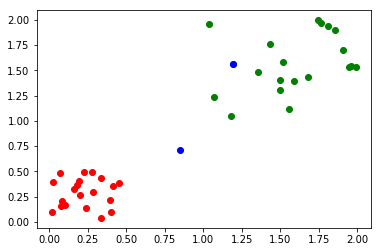

centroids 1 [0.98491685 1.25012303]
centroids 2 [0.22331067 0.28960446]
centroids 2 [1.58058247 1.56897412]
centroids 3 [0.22331067 0.28960446]
centroids 3 [1.58058247 1.56897412]
centroids 4 [0.22331067 0.28960446]
centroids 4 [1.58058247 1.56897412]


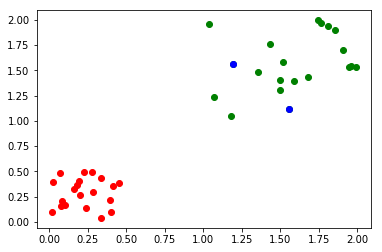

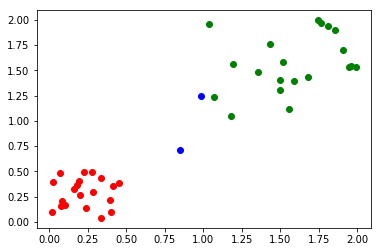

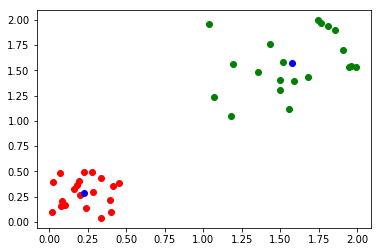

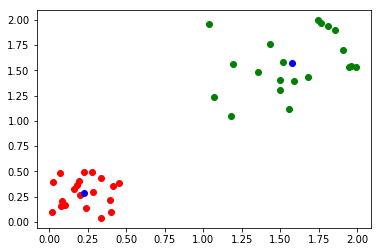

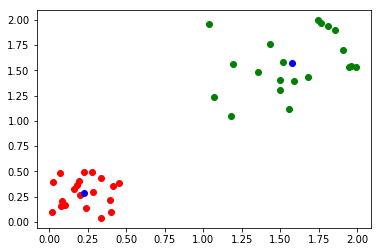

In [18]:
%matplotlib inline

# Execute
execute()